In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell

body = client_50ed057492004d1a9379432dd6d50a53.get_object(Bucket='capstone2-donotdelete-pr-waarhm1h2mmaod',Key='airports_in_india.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +code +iso2,#adm1 +code +iso,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,26555,VIDP,large_airport,Indira Gandhi International Airport,28.5665,77.103104,777,AS,IN,IN-DL,New Delhi,1,VIDP,DEL,NaN,http://www.newdelhiairport.in/,http://en.wikipedia.org/wiki/Indira_Gandhi_Int...,Palam Air Force Station,51475,2017-12-15T03:08:58+00:00
2,26434,VABB,large_airport,Chhatrapati Shivaji International Airport,19.0886993408,72.8678970337,39,AS,IN,IN-MM,Mumbai,1,VABB,BOM,NaN,http://www.csia.in/,http://en.wikipedia.org/wiki/Chhatrapati_Shiva...,"Bombay, Sahar International Airport",1014475,2013-04-12T01:27:48+00:00
3,35145,VOBL,large_airport,Kempegowda International Airport,13.1979,77.706299,3000,AS,IN,IN-KA,Bangalore,1,VOBL,BLR,NaN,http://www.bengaluruairport.com/home/home.jspx,https://en.wikipedia.org/wiki/Kempegowda_Inter...,NaN,51200,2016-02-01T17:54:36+00:00
4,26618,VOMM,large_airport,Chennai International Airport,12.990005493164062,80.16929626464844,52,AS,IN,IN-TN,Chennai,1,VOMM,MAA,NaN,NaN,http://en.wikipedia.org/wiki/Chennai_Internati...,NaN,51150,2008-12-07T02:26:07+00:00


### Data Preprocessing

In [4]:
# Drop the First Row 

df = df.drop(df.index[0])
df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
1,26555,VIDP,large_airport,Indira Gandhi International Airport,28.5665,77.103104,777,AS,IN,IN-DL,New Delhi,1,VIDP,DEL,NaN,http://www.newdelhiairport.in/,http://en.wikipedia.org/wiki/Indira_Gandhi_Int...,Palam Air Force Station,51475,2017-12-15T03:08:58+00:00
2,26434,VABB,large_airport,Chhatrapati Shivaji International Airport,19.0886993408,72.8678970337,39,AS,IN,IN-MM,Mumbai,1,VABB,BOM,NaN,http://www.csia.in/,http://en.wikipedia.org/wiki/Chhatrapati_Shiva...,"Bombay, Sahar International Airport",1014475,2013-04-12T01:27:48+00:00
3,35145,VOBL,large_airport,Kempegowda International Airport,13.1979,77.706299,3000,AS,IN,IN-KA,Bangalore,1,VOBL,BLR,NaN,http://www.bengaluruairport.com/home/home.jspx,https://en.wikipedia.org/wiki/Kempegowda_Inter...,NaN,51200,2016-02-01T17:54:36+00:00
4,26618,VOMM,large_airport,Chennai International Airport,12.990005493164062,80.16929626464844,52,AS,IN,IN-TN,Chennai,1,VOMM,MAA,NaN,NaN,http://en.wikipedia.org/wiki/Chennai_Internati...,NaN,51150,2008-12-07T02:26:07+00:00
5,26444,VAGO,large_airport,Dabolim Airport,15.3808002472,73.8313980103,150,AS,IN,IN-GA,Vasco da Gama,1,VOGO,GOI,NaN,NaN,http://en.wikipedia.org/wiki/Dabolim_Airport,"Goa Airport, Dabolim Navy Airbase, दाबोळी विमानतळ",875,2013-04-27T02:00:28+00:00


In [5]:
#Fetch only necessary Values

df1 = pd.DataFrame(df[['type','name','iso_region', 'municipality','score','latitude_deg', 'longitude_deg']])
df1.head()

,type,name,iso_region,municipality,score,latitude_deg,longitude_deg
1,large_airport,Indira Gandhi International Airport,IN-DL,New Delhi,51475,28.5665,77.103104
2,large_airport,Chhatrapati Shivaji International Airport,IN-MM,Mumbai,1014475,19.0886993408,72.8678970337
3,large_airport,Kempegowda International Airport,IN-KA,Bangalore,51200,13.1979,77.706299
4,large_airport,Chennai International Airport,IN-TN,Chennai,51150,12.990005493164062,80.16929626464844
5,large_airport,Dabolim Airport,IN-GA,Vasco da Gama,875,15.3808002472,73.8313980103


In [6]:
# Drop the rows with invalid location data

df1.loc[(df1['latitude_deg'] == '0')]

,type,name,iso_region,municipality,score,latitude_deg,longitude_deg
252,small_airport,INDRA GANDHI AIRPORT,IN-DL,NaN,0,0,0
259,medium_airport,@@ Online Istikhara for Love Problem +91-98287...,IN-KA,NaN,0,0,0
323,small_airport,Muhammad Ali Khan,IN-DL,New Delhi,0,0,0


In [7]:
df1.drop(df1[df1['latitude_deg'] == '0'].index, inplace = True) 

In [8]:
# Remove duplicate data and retain only one copy of data

df1.drop_duplicates(subset = 'name', keep = 'first', inplace = True)

In [9]:
df1.shape

(338, 7)

### Connect to Foursquare API

In [10]:
CLIENT_ID = 'YUACQAZGUUGTH1WOTE25S0LUMKZO0UVBHPJCIBKAEMHBGPGL' 
CLIENT_SECRET = 'V3K3SXMPMVBMFO1IHNJ1SABKJGL2RDMBYCSUPMFCMZJWJ3BK' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YUACQAZGUUGTH1WOTE25S0LUMKZO0UVBHPJCIBKAEMHBGPGL
CLIENT_SECRET:V3K3SXMPMVBMFO1IHNJ1SABKJGL2RDMBYCSUPMFCMZJWJ3BK


In [11]:
def getNearbyVenues(name, municipality , latitudes, longitudes, radius=500):
    
    venues_list=[]
    count = 0
    for name, mun, lat, lng in zip(name, municipality, latitudes, longitudes):
        print("Fetching venues for : ",name) 

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            mun,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name',
                             'Municipality',
                             'Latitude', 
                             'Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    print(type(nearby_venues))
    return(nearby_venues)

In [12]:
nearby = getNearbyVenues(name=df1['name'],latitudes=df1['latitude_deg'],longitudes=df1['longitude_deg'],municipality=df1['municipality'])

Fetching venues for :  Indira Gandhi International Airport
Fetching venues for :  Chhatrapati Shivaji International Airport
Fetching venues for :  Kempegowda International Airport
Fetching venues for :  Chennai International Airport
Fetching venues for :  Dabolim Airport
Fetching venues for :  Cochin International Airport
Fetching venues for :  Netaji Subhash Chandra Bose International Airport
Fetching venues for :  Rajiv Gandhi International Airport
Fetching venues for :  Trivandrum International Airport
Fetching venues for :  Sardar Vallabhbhai Patel International Airport
Fetching venues for :  Jaipur International Airport
Fetching venues for :  HAL Airport
Fetching venues for :  Pune Airport
Fetching venues for :  Sri Guru Ram Dass Jee International Airport
Fetching venues for :  Vadodara Airport
Fetching venues for :  Mangalore International Airport
Fetching venues for :  Begumpet Airport
Fetching venues for :  Lal Bahadur Shastri Airport
Fetching venues for :  Calicut Internationa

In [13]:
nearby.head()

,Name,Municipality,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Indira Gandhi International Airport,New Delhi,28.5665,77.103104,Arrival Terminal,28.564559,77.107258,Airport Terminal
1,Chhatrapati Shivaji International Airport,Mumbai,19.0886993408,72.8678970337,Chhatrapati Shivaji International Airport,19.090509,72.865148,Airport
2,Chhatrapati Shivaji International Airport,Mumbai,19.0886993408,72.8678970337,Starbucks,19.091774,72.868675,Coffee Shop
3,Chhatrapati Shivaji International Airport,Mumbai,19.0886993408,72.8678970337,BOM/VABB Runway 09/27,19.088076,72.864418,Airport Service
4,Chhatrapati Shivaji International Airport,Mumbai,19.0886993408,72.8678970337,Apron Control,19.091559,72.865813,Airport


### Segmentation - Check the neighborhood of every airport location

In [48]:
nearby.groupby('Venue Category').count()['Name'].sort_values(ascending=False).head(10)

Venue Category
Airport              41
Airport Terminal     34
Airport Service      17
Café                 10
Indian Restaurant     8
Airport Lounge        7
Coffee Shop           7
Hotel                 5
Bakery                5
ATM                   5
Name: Name, dtype: int64

In [49]:
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
nearby_onehot = pd.get_dummies(nearby[['Venue Category']])
nearby_onehot['Municipality'] = nearby['Municipality']
nearby_grouped = nearby_onehot.groupby('Municipality').mean().reset_index()
nearby_grouped.shape

(70, 72)

In [51]:
top_venues = 5
for n in nearby_grouped['Municipality']:
    print('---------',n,'---------')
    temp = nearby_grouped[nearby_grouped['Municipality'] == n].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

--------- Aamby Valley City ---------
                              Venue  Frequency
0   Venue Category_Airport Terminal        1.0
1                Venue Category_ATM        0.0
2  Venue Category_Indian Restaurant        0.0
3      Venue Category_Movie Theater        0.0
4        Venue Category_Men's Store        0.0


--------- Ahmedabad ---------
                          Venue  Frequency
0            Venue Category_ATM       0.33
1   Venue Category_Dessert Shop       0.33
2         Venue Category_Bakery       0.33
3           Venue Category_Park       0.00
4  Venue Category_Movie Theater       0.00


--------- Aizawl ---------
                              Venue  Frequency
0            Venue Category_Airport        1.0
1                Venue Category_ATM        0.0
2  Venue Category_Indian Restaurant        0.0
3      Venue Category_Movie Theater        0.0
4        Venue Category_Men's Store        0.0


--------- Allahabad ---------
                              Venue  Frequency


### K-Means Clustering

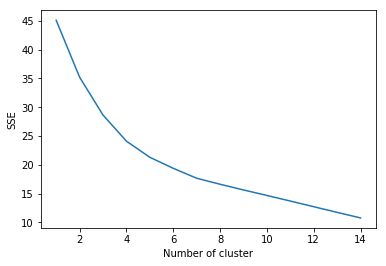

In [52]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_grouped.drop('Municipality',axis=1))
    nearby_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [53]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(nearby_grouped.drop('Municipality',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [54]:
nearby_grouped['Cluster'] = kmeans.labels_

In [55]:
nearby_grouped.groupby('Cluster')['Municipality'].count()

Cluster
0    23
1     7
2    32
3     8
Name: Municipality, dtype: int64

In [56]:
nearby_grouped.shape

(70, 73)

### Plot the clusters in the map

In [57]:
import numpy as np
# create map
map_clusters = folium.Map(location=[28.5665,77.103104],zoom_start=10)

k=4

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [58]:
nearby['Latitude'] = nearby['Latitude'].astype(float)
nearby['Longitude'] = nearby['Longitude'].astype(float)

In [59]:
# add markers to the map
markers_colors = []

for lat, lon, cluster in zip(nearby['Latitude'], nearby['Longitude'], nearby_grouped['Cluster']):
    
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Check the Cluster Data

In [60]:
nearby_grouped.loc[nearby_grouped['Cluster']==0]

,Municipality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,...,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_South Indian Restaurant,Venue Category_Supplement Shop,Venue Category_Taxi Stand,Venue Category_Tea Room,Venue Category_Travel Lounge,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Cluster
6,Bangalore,0.0,0.000000,0.047619,0.000000,0.000000,0.047619,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.047619,0.000000,0.000000,0.047619,0.0,0
16,Coimbatore,0.0,0.000000,0.200000,0.000000,0.100000,0.300000,0.0,0.0,0.0,...,0.0,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
22,Hyderabad,0.0,0.066667,0.066667,0.066667,0.066667,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.0,0.000000,0.000000,0.000000,0.066667,0.0,0
27,Jamnagar,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
28,Jamshedpur,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
29,Jodhpur,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
30,Kangla,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
32,Kanpur,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0
40,Mathura,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0
41,Mumbai,0.0,0.000000,0.105263,0.000000,0.000000,0.052632,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.052632,0.000000,0.000000,0.0,0


In [61]:
nearby_grouped.loc[nearby_grouped['Cluster']==1]

,Municipality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,...,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_South Indian Restaurant,Venue Category_Supplement Shop,Venue Category_Taxi Stand,Venue Category_Tea Room,Venue Category_Travel Lounge,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Cluster
24,Jaipur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
34,Kochi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44,Nashik,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
54,Rajouri,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
62,Tiruchirappally,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
64,Upper Tadong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68,Warangal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [62]:
nearby_grouped.loc[nearby_grouped['Cluster']==2]

,Municipality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,...,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_South Indian Restaurant,Venue Category_Supplement Shop,Venue Category_Taxi Stand,Venue Category_Tea Room,Venue Category_Travel Lounge,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Cluster
0,Aamby Valley City,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,Aizawl,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Allahabad,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,Amreli,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,Aurangabad,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,Bhavnagar,0.0,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,Bhopal,0.0,0.0,0.666667,0.0,0.0,0.333333,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,Bhuj,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
13,Calicut,0.0,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14,Chandigarh,0.0,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.000000,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [63]:
nearby_grouped.loc[nearby_grouped['Cluster']==3]

,Municipality,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,...,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_South Indian Restaurant,Venue Category_Supplement Shop,Venue Category_Taxi Stand,Venue Category_Tea Room,Venue Category_Travel Lounge,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wine Shop,Cluster
1,Ahmedabad,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,Behala,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,Bengaluru,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
12,Bilaspur,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
26,Jammu,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
38,Lucknow,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
39,Mangalore,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
67,Vijay Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


### Visualization

In [70]:
Bank = ['Venue Category_ATM', 'Venue Category_Bank']
Airport = ['Venue Category_Travel Lounge','Venue Category_Plane','Venue Category_Platform','Venue Category_Lounge','Venue Category_Airport','Venue Category_Airport Food Court', 'Venue Category_Airport Gate','Venue Category_Airport Lounge','Venue Category_Airport Service','Venue Category_Airport Terminal']
Bar = ['Venue Category_Wine Shop','Venue Category_Smoke Shop','Venue Category_Bar', 'Venue Category_Beer Bar', 'Venue Category_Nightclub']
Hotel = ['Venue Category_Vegetarian / Vegan Restaurant','Venue Category_South Indian Restaurant','Venue Category_Restaurant','Venue Category_Japanese Restaurant','Venue Category_Italian Restaurant','Venue Category_Indian Restaurant','Venue Category_Hotel','Venue Category_German Restaurant','Venue Category_French Restaurant','Venue Category_Food Court','Venue Category_Fast Food Restaurant','Venue Category_Doner Restaurant','Venue Category_Asian Restaurant','Venue Category_Bakery', 'Venue Category_Chinese Restaurant']
Shops = ['Venue Category_Duty-free Shop','Venue Category_Accessories Store', 'Venue Category_Convenience Store','Venue Category_Arts & Crafts Store','Venue Category_Supplement Shop','Venue Category_Shopping Mall','Venue Category_Shoe Store','Venue Category_Bookstore','Venue Category_Clothing Store',"Venue Category_Men's Store"]
Visits = ['Venue Category_Taxi Stand','Venue Category_Scenic Lookout', 'Venue Category_Resort', 'Venue Category_Park','Venue Category_Movie Theater','Venue Category_Indie Movie Theater','Venue Category_IT Services','Venue Category_History Museum','Venue Category_Historic Site','Venue Category_Heliport','Venue Category_Health & Beauty Service','Venue Category_Gym','Venue Category_Garden','Venue Category_Farmers Market','Venue Category_Bus Station','Venue Category_Club House']
Bakery = ['Venue Category_Sandwich Place','Venue Category_Mac & Cheese Joint','Venue Category_Ice Cream Shop','Venue Category_Hot Spring','Venue Category_Dessert Shop','Venue Category_Cafeteria','Venue Category_Café','Venue Category_Breakfast Spot','Venue Category_Brewery','Venue Category_Coffee Shop']

In [71]:
a1 = pd.DataFrame(nearby_grouped[Bakery]).sum(axis = 1)
a1 = a1.to_frame()
a2 = pd.DataFrame(nearby_grouped[Hotel]).sum(axis = 1)
a2 = a2.to_frame()
a3 = pd.DataFrame(nearby_grouped[Shops]).sum(axis = 1)
a3 = a3.to_frame()
a4 = pd.DataFrame(nearby_grouped[Bar]).sum(axis = 1)
a4 = a4.to_frame()

In [72]:
a1.columns = ['Bakery']
a2.columns = ['Bar']
a3.columns = ['Hotel']
a4.columns = ['Shops']

In [73]:
a = pd.DataFrame()
a['Name'] = nearby_grouped['Municipality']
a['Bakery'] = a1['Bakery']
a['Bar'] = a2['Bar']
a['Hotel'] = a3['Hotel']
a['Shops'] = a4['Shops']
a.describe()


,Bakery,Bar,Hotel,Shops
count,70.000000,70.000000,70.000000,70.000000
mean,0.068684,0.141049,0.069252,0.021432
std,0.173135,0.310385,0.218688,0.123528
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'State')

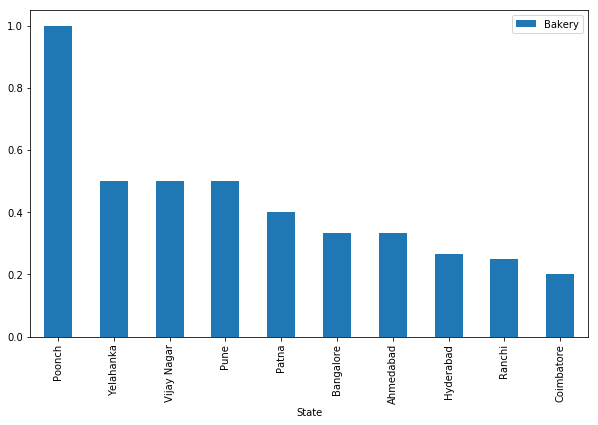

In [74]:
g1 = pd.DataFrame(a.groupby('Name')['Bakery'].sum())
g1 = g1.sort_values(by='Bakery', ascending = False)
g1.iloc[:10].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('State')

Text(0.5, 0, 'State')

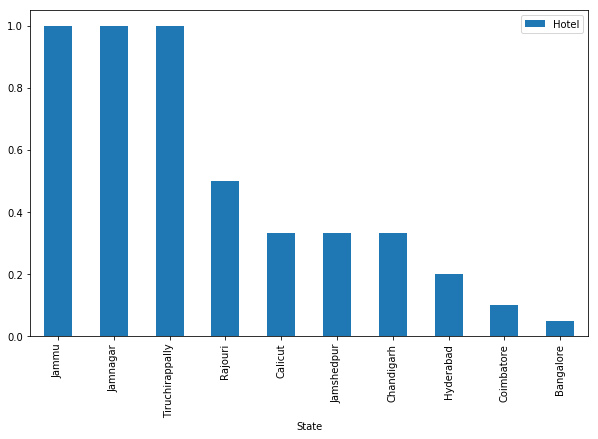

In [76]:
g2 = pd.DataFrame(a.groupby('Name')['Hotel'].sum())
g2 = g2.sort_values(by='Hotel', ascending = False)
g2.iloc[:10].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('State')

Text(0.5, 0, 'State')

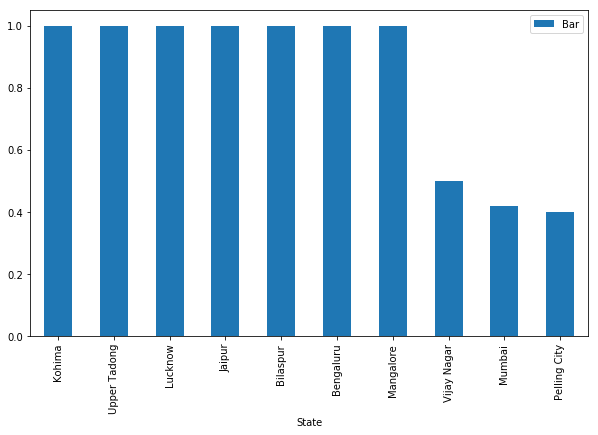

In [77]:
g3 = pd.DataFrame(a.groupby('Name')['Bar'].sum())
g3 = g3.sort_values(by='Bar', ascending = False)
g3.iloc[:10].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('State')

Text(0.5, 0, 'State')

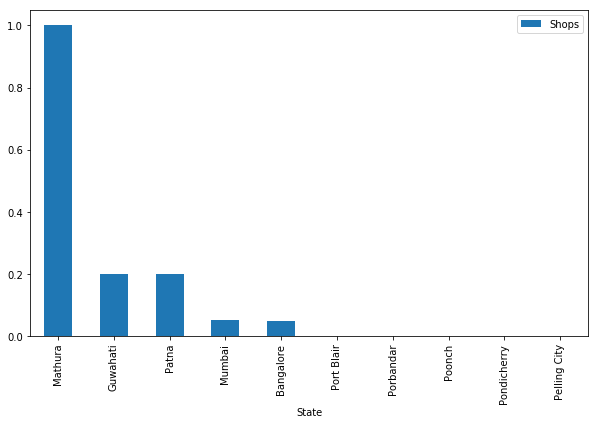

In [78]:
g4= pd.DataFrame(a.groupby('Name')['Shops'].sum())
g4 = g4.sort_values(by='Shops', ascending = False)
g4.iloc[:10].plot(kind = 'bar', figsize = (10,6))
plt.xlabel('State')

In [79]:
a['sum'] = a.sum(axis = 1)

Text(0.5, 0, 'State')

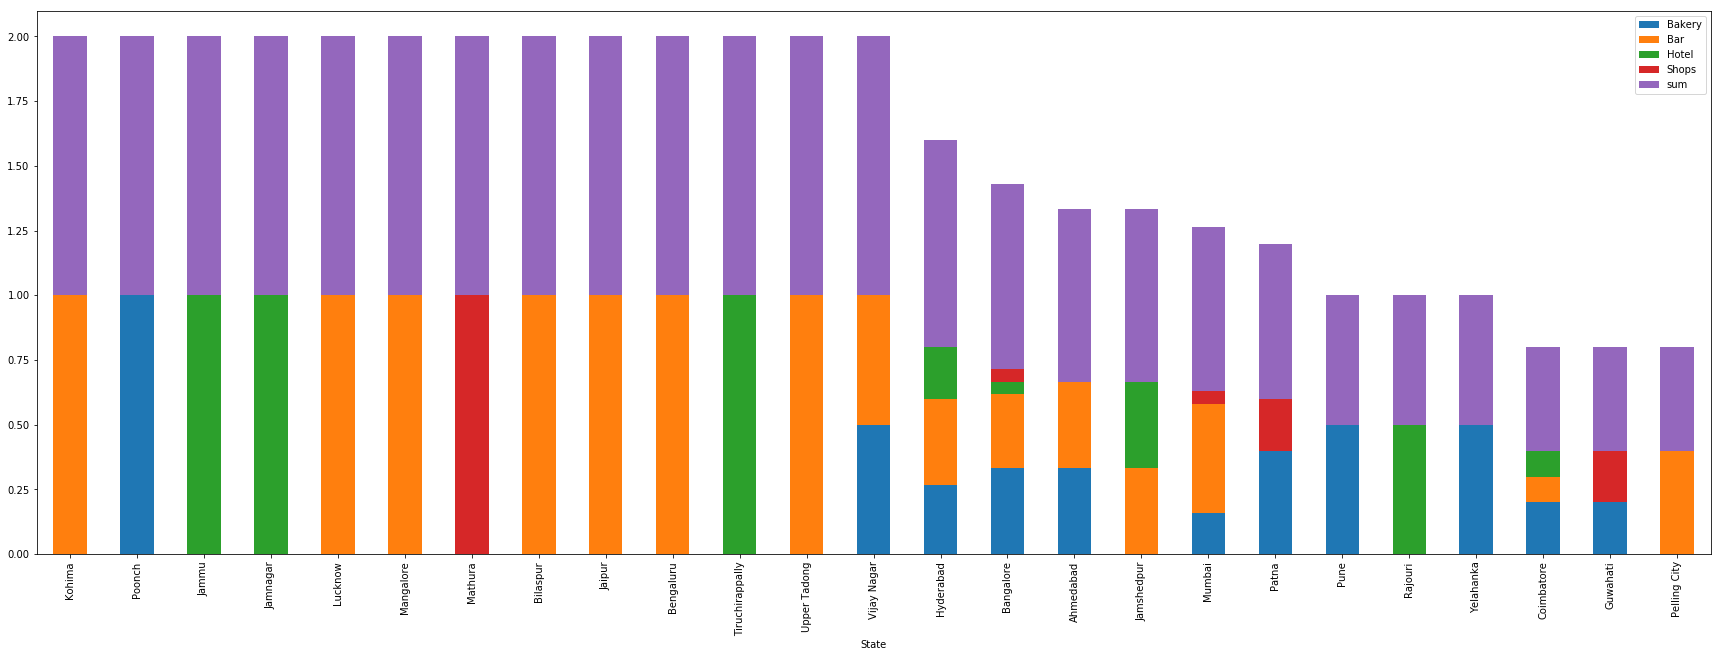

In [80]:
g5 = pd.DataFrame(a.groupby('Name').sum())
g5 = g5.sort_values(by='sum', ascending = False)
g5.iloc[:25].plot(kind = 'bar', figsize = (30,10), stacked = True)
plt.xlabel('State')